<a href="https://colab.research.google.com/github/Woominju/Deep-learning/blob/main/GAN_non_smile_2nd_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:

pwd

'/content'

In [10]:

cd drive/MyDrive/non_smile


/content/drive/MyDrive/non_smile


Text(0.5, 1.0, 'non_imle')

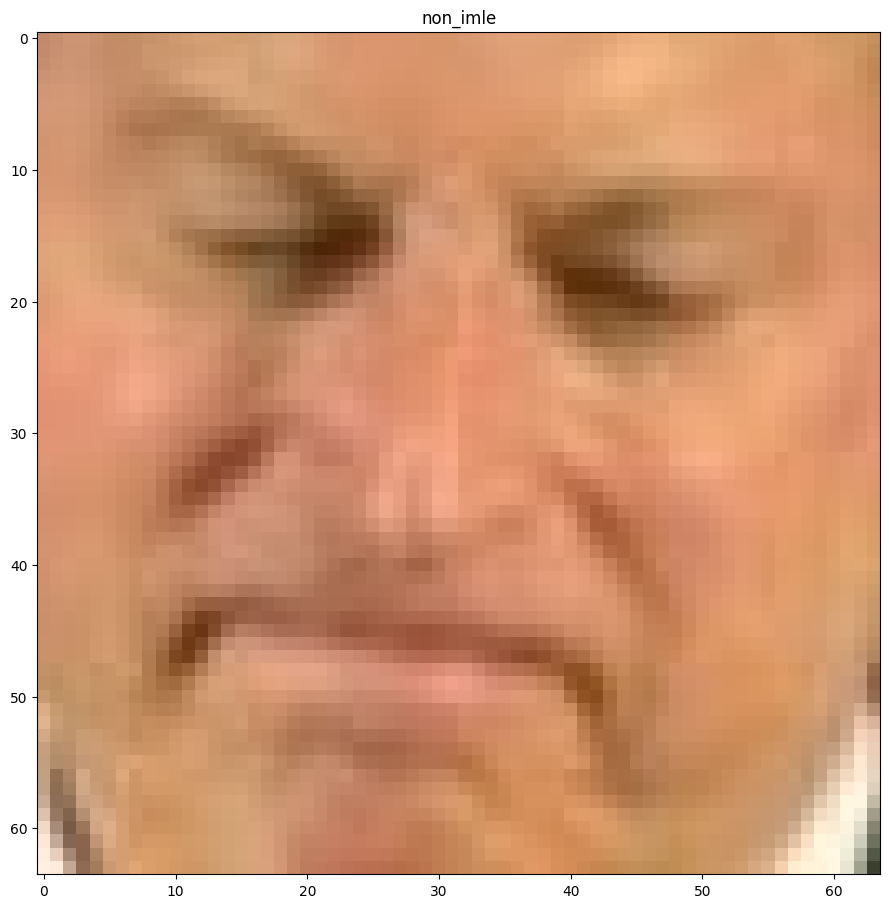

In [14]:

import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('non_smile/Al_Gore_0008.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('non_imle')

In [15]:

image_sample.shape

(64, 64, 3)

In [16]:

pwd


'/content/drive/MyDrive/non_smile'

In [17]:

cd ..

/content/drive/MyDrive


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환
    )

train = train_gen.flow_from_directory(directory='non_smile',
                                              target_size=(64, 64),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              color_mode='rgb',      # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                             # class_mode='categorical'
                                              batch_size=1)
                                             # shuffle=True)
len(train[0][0])

train[0][0][0] ## 첫번째 배치의 첫번째




Found 603 images belonging to 1 classes.


array([[[0.67058825, 0.5058824 , 0.34117648],
        [0.7019608 , 0.5372549 , 0.37254903],
        [0.7176471 , 0.5529412 , 0.38823533],
        ...,
        [0.82745105, 0.7294118 , 0.6117647 ],
        [0.8235295 , 0.7254902 , 0.60784316],
        [0.83921576, 0.7411765 , 0.62352943]],

       [[0.6745098 , 0.50980395, 0.34509805],
        [0.7058824 , 0.5529412 , 0.38431376],
        [0.7411765 , 0.5764706 , 0.41176474],
        ...,
        [0.8862746 , 0.78823537, 0.67058825],
        [0.85098046, 0.75294125, 0.63529414],
        [0.8352942 , 0.7372549 , 0.61960787]],

       [[0.68235296, 0.5294118 , 0.36862746],
        [0.70980394, 0.5647059 , 0.40000004],
        [0.73333335, 0.5803922 , 0.41960788],
        ...,
        [0.9333334 , 0.8313726 , 0.7254902 ],
        [0.8862746 , 0.78823537, 0.67058825],
        [0.8431373 , 0.74509805, 0.627451  ]],

       ...,

       [[0.44705886, 0.454902  , 0.43529415],
        [0.4431373 , 0.454902  , 0.427451  ],
        [0.4431373 , 0

In [20]:

train[0][0][0].shape

(64, 64, 3)

In [21]:

train[0][0].shape

(1, 64, 64, 3)

In [22]:
train[0][0]

array([[[[0.67058825, 0.5058824 , 0.34117648],
         [0.7019608 , 0.5372549 , 0.37254903],
         [0.7176471 , 0.5529412 , 0.38823533],
         ...,
         [0.82745105, 0.7294118 , 0.6117647 ],
         [0.8235295 , 0.7254902 , 0.60784316],
         [0.83921576, 0.7411765 , 0.62352943]],

        [[0.6745098 , 0.50980395, 0.34509805],
         [0.7058824 , 0.5529412 , 0.38431376],
         [0.7411765 , 0.5764706 , 0.41176474],
         ...,
         [0.8862746 , 0.78823537, 0.67058825],
         [0.85098046, 0.75294125, 0.63529414],
         [0.8352942 , 0.7372549 , 0.61960787]],

        [[0.68235296, 0.5294118 , 0.36862746],
         [0.70980394, 0.5647059 , 0.40000004],
         [0.73333335, 0.5803922 , 0.41960788],
         ...,
         [0.9333334 , 0.8313726 , 0.7254902 ],
         [0.8862746 , 0.78823537, 0.67058825],
         [0.8431373 , 0.74509805, 0.627451  ]],

        ...,

        [[0.44705886, 0.454902  , 0.43529415],
         [0.4431373 , 0.454902  , 0.427451  ]

In [23]:

type(train[0][0])

numpy.ndarray

In [24]:

## 여기는 실험을 하기 위해 만든 부분이라서 숙제에 넣을 필요가 없습니다.

ABC = np.array(train[0][0])

BCD = np.append(ABC, train[1][0], axis =0 )

BCD.shape

(2, 64, 64, 3)

In [26]:
X_train = np.array(train[0][0])

for i in range(1,603):
  X_train = np.append(X_train, train[i][0], axis = 0)

X_train.shape


(603, 64, 64, 3)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 11ms/step
6000 [D loss: 0.392659, acc.: 96.09%] [G loss: 1.581341]
4/4 [==============================] - 0s 16ms/step
7000 [D loss: 0.711160, acc.: 48.44%] [G loss: 0.962912]
4/4 [==============================] - 0s 9ms/step
8000 [D loss: 0.874477, acc.: 25.39%] [G loss: 0.842569]
4/4 [==============================] - 0s 10ms/step
9000 [D loss: 1.203291, acc.: 24.22%] [G loss: 0.605895]
4/4 [==============================] - 0s 9ms/step
10000 [D loss: 0.685595, acc.: 57.42%] [G loss: 1.108618]
1/1 [==============================] - 0s 38ms/step


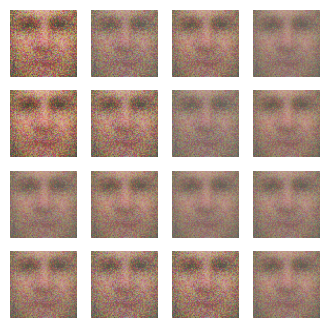

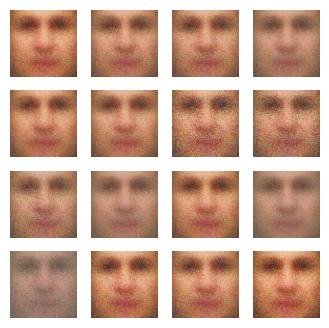

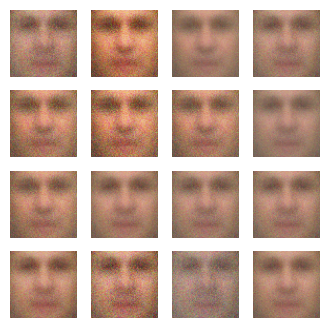

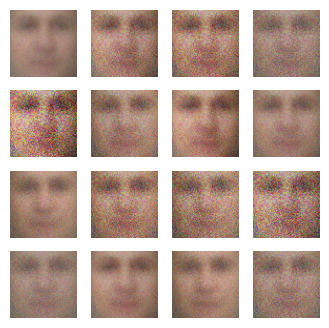

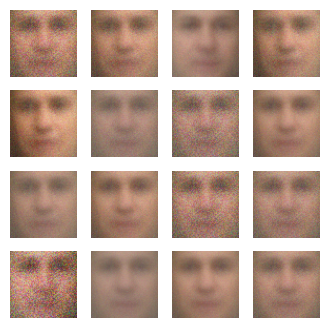

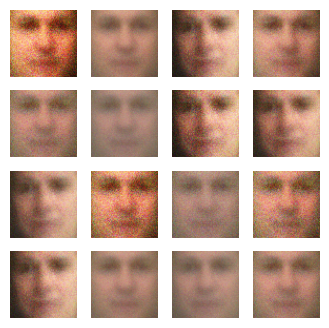

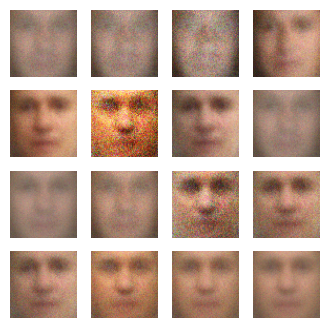

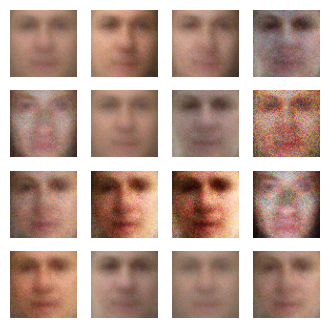

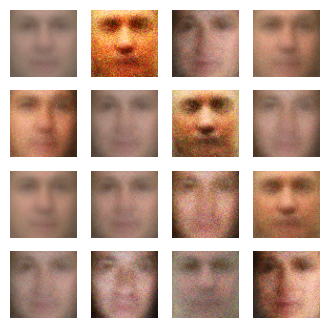

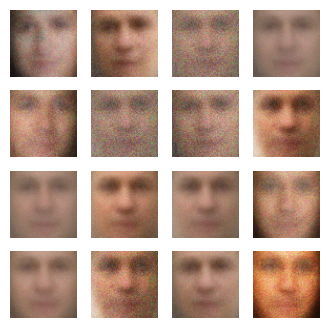

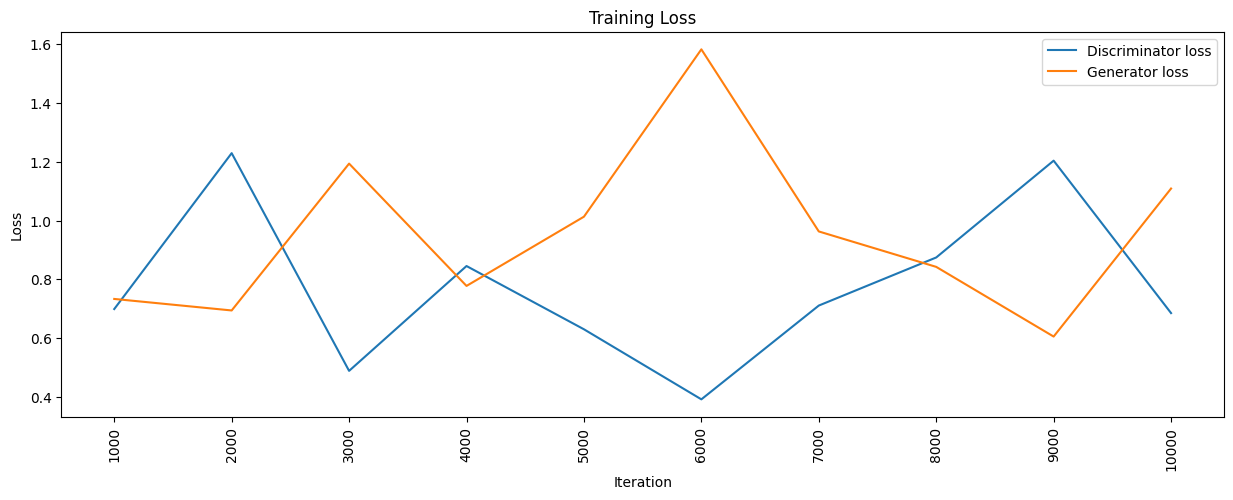

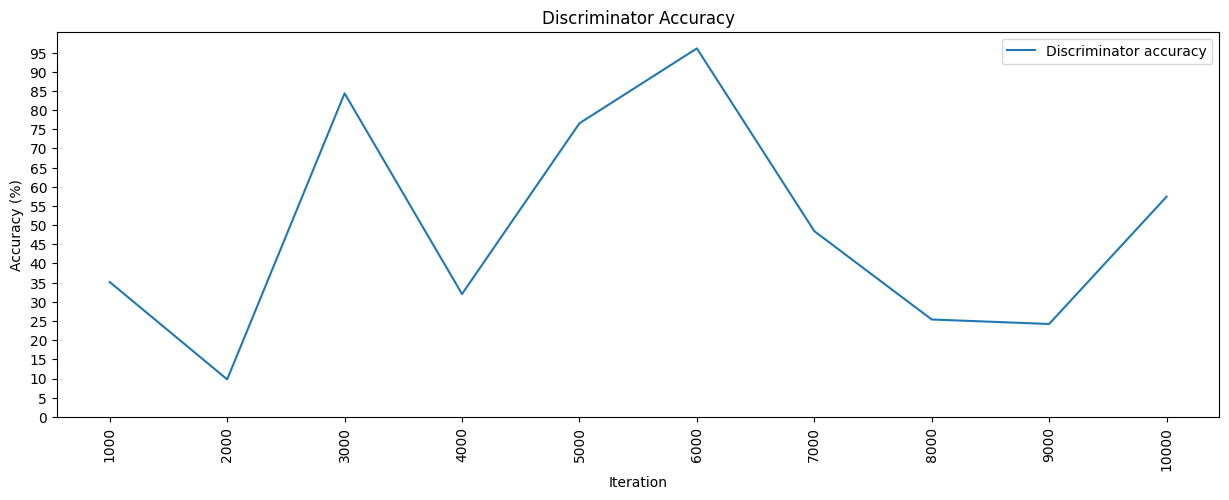

In [27]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam


img_rows = 64
img_cols = 64
channels = 3
img_shape = (img_rows, img_cols, channels)
z_dim = 100


def build_generator(img_shape, z_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(64 * 64 * 3, activation='sigmoid'))
    model.add(Reshape(img_shape))

    return model


def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))

    return model


def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)

    return model


discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(),
                      metrics=['accuracy'])

generator = build_generator(img_shape, z_dim)


gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

losses = []
accuracies = []
iteration_checkpoints = []




def train(iterations, batch_size, sample_interval, X_train2):

    X_train = X_train2
 ###   X_train = np.expand_dims(X_train, axis=3)

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        discriminator.trainable = True

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        discriminator.trainable = False

        z = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)



def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    gen_imgs = generator.predict(z)
    ###gen_imgs = 0.5*gen_imgs

    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, :] )#, cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 10000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval, X_train)

losses = np.array(losses)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

accuracies = np.array(accuracies)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()
